# Bite 10: Bar charts with matplotlib

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Curbal-Data-Labs/python-bites/blob/main/Bites/Bite10.ipynb)

### Video tutorial and Bite 10 available [here](https://curbal.com/curbal-learning-portal/bite-10)

[![Bite 1](https://img.youtube.com/vi/ZgqnPYmEcXw/0.jpg)](https://www.youtube.com/watch?v=ZgqnPYmEcXw)

**1.** Connect to the database

In [9]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_data():
    #read the db
    global df_tbl
    global conn
    conn = sqlite3.connect(r'C:\Users\Ruth Pozuelo\Documents\GitHub\local-python-game\Data\murder-mystery.db')
    #List all tables in dB and convert them to a list
    df_tbl = pd.read_sql_query('SELECT name from sqlite_master where type= "table"',conn)
    df_tbl = df_tbl.name.tolist()   #convert to list

get_data()    
df_tbl

['crime_scene_report',
 'drivers_license',
 'facebook_event_checkin',
 'interview',
 'get_fit_now_member',
 'get_fit_now_check_in',
 'income',
 'person',
 'crimes_geo']

**2.** Get the data from the Crime Scene Report table

In [10]:
df = pd.read_sql_query("SELECT * from crime_scene_report", conn)
df

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,be NO mistake about it: it was neither more no...,Trenton


**3.** Aggregate the number of crimes by type

In [15]:
df3 = df.groupby (['type'])['type'].count().reset_index(name= 'crimes').sort_values('crimes', ascending = False)
df3

,type,crimes
0,arson,148
5,murder,148
1,assault,145
8,theft,141
3,bribery,135
6,robbery,134
2,blackmail,130
4,fraud,130
7,smuggling,117


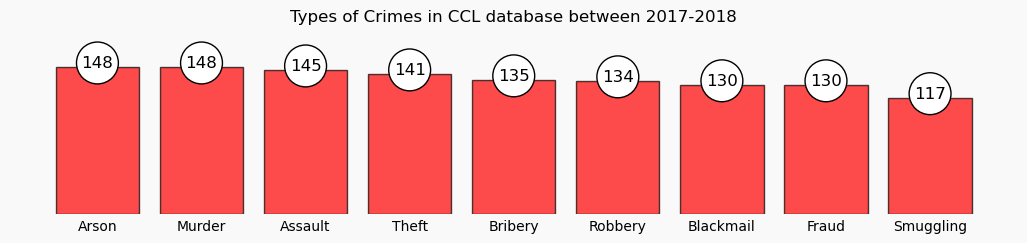

In [32]:
# creates the Figure and adds a single Axes object
fig, ax = plt.subplots(figsize=(13,2),facecolor = "#F9F9F9")

category_names = df3.type.str.title() #proper casing for x axis
totals = df3.crimes

ax.bar(category_names, totals, color = 'red', alpha = 0.7, edgecolor = "black")

# hide some of the spines
ax.set_frame_on(False) 

plt.yticks([]) #remove y ticks and labels
ax.tick_params(axis='x',length=0) #remove x ticks but keep tick labels

#plot title
ax.set_title('Types of Crimes in CCL database between 2017-2018', y=1.2)

for x,y in zip(category_names, totals):

    ax.annotate(y, xy = (x,y), xytext = (x,y), ha= 'center', size = 12,
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle',) )


# Bite 10: Put the game together as instructed on the website